# Linear Regression

Student: Noa Pereira Prada Schnor

Student ID: A00326381

### Dataset Overview

#### Name: QSAR Fish Toxicity

#### Purpose
This dataset is primarily used to predict acute aquatic toxicity for the fish species *Pimephales promelas* (commonly known as the fathead minnow) based on a collection of 908 chemical compounds.

#### Target Variable
- **Name:** LC50
- **Units:** -log(mol/L)
- **Description:** This metric represents the concentration in mol/L at which 50% of the test fish population dies within a 96-hour exposure period.
- **Relevance:** The LC50 value is a critical indicator of a chemical's toxicity, with higher LC50 values generally indicating lower toxicity and safer substances.

#### Feature Variables
- **MLOGP:** Describes molecular properties.
- **CI0:** Provides information indices.
- **GATS1i:** Represents two-dimensional autocorrelation descriptors.
- **NdssC:** Denotes atom-type counts.
- **NdsCH:** Also denotes atom-type counts.
- **SM1_Dz(Z):** Involves two-dimensional matrix-based descriptors.

#### Additional Resources
For further information and studies related to this dataset, please refer to the following sources:
- [UCI Machine Learning Repository: QSAR Fish Toxicity Dataset](https://archive.ics.uci.edu/dataset/504/qsar+fish+toxicity)
- M. Cassotti, D. Ballabio, R. Todeschini, V. Consonni. *"A Similarity-Based QSAR Model for Predicting Acute Toxicity Towards the Fathead Minnow (Pimephales promelas),"* SAR and QSAR in Environmental Research, 2015, Vol. 26, pp. 217-243; DOI: 10.1081062936X.2015.1018938.

62936X.2015.1018938.


### Import libraries

In [4]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import math
import numpy as np
import seaborn as sns

### Load data and initial data checking

In [6]:
df = pd.read_csv("data/qsar_fish_toxicity.csv") #read the csv file

In [7]:
#Check first 5 rows of the df
df.head()

,3.26;0.829;1.676;0;1;1.453;3.770
0,2.189;0.58;0.863;0;0;1.348;3.115
1,2.125;0.638;0.831;0;0;1.348;3.531
2,3.027;0.331;1.472;1;0;1.807;3.510
3,2.094;0.827;0.86;0;0;1.886;5.390
4,3.222;0.331;2.177;0;0;0.706;1.819


- df with no header
- delimiter is a ';', not a comma. Reload the data using the correct delimiter.

In [9]:
#read the data again using ';' as delimiter
df = pd.read_csv("data/qsar_fish_toxicity.csv", delimiter=';') # use ';' as delimiter

In [10]:
#Dataset without column names set the column names based on the information provided on the dataset
column_names = ['CIC0', 'SM1_Dz(Z)', 'GATS1i', 'NdsCH', 'NdssC', 'MLOGP', 'LC50']
df = pd.read_csv("data/qsar_fish_toxicity.csv", delimiter=';', header=None, names=column_names)

# Check the DataFrame
df.head()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


### Data exploration

In [12]:
#Get df info: number of columns, column names, number of instances, data type of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CIC0       908 non-null    float64
 1   SM1_Dz(Z)  908 non-null    float64
 2   GATS1i     908 non-null    float64
 3   NdsCH      908 non-null    int64  
 4   NdssC      908 non-null    int64  
 5   MLOGP      908 non-null    float64
 6   LC50       908 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 49.8 KB


- 908 instances
- no missing data
- numerical columns: integers and floats

In [14]:
#Check the range (min-max), mean, percentiles incl median (50%), and standard deviation of the numerical columns (in this dataset all columns are numerical
df.describe()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,2.898129,0.628468,1.293591,0.229075,0.485683,2.109285,4.064431
std,0.756088,0.428459,0.394303,0.605335,0.861279,1.433181,1.455698
min,0.667000,0.000000,0.396000,0.000000,0.000000,-2.884000,0.053000
25%,2.347000,0.223000,0.950750,0.000000,0.000000,1.209000,3.151750
50%,2.934000,0.570000,1.240500,0.000000,0.000000,2.127000,3.987500
75%,3.407000,0.892750,1.562250,0.000000,1.000000,3.105000,4.907500
max,5.926000,2.171000,2.920000,4.000000,6.000000,6.515000,9.612000


- MLOGP: seems to be the only feature with negative values (min = -2.884000)
- Wide range between min and max of some columns (CICO, GATS1i, MLOGP, LC50)
- Limited variability found in SM1_Dz(Z), NdsCH, and NdssC

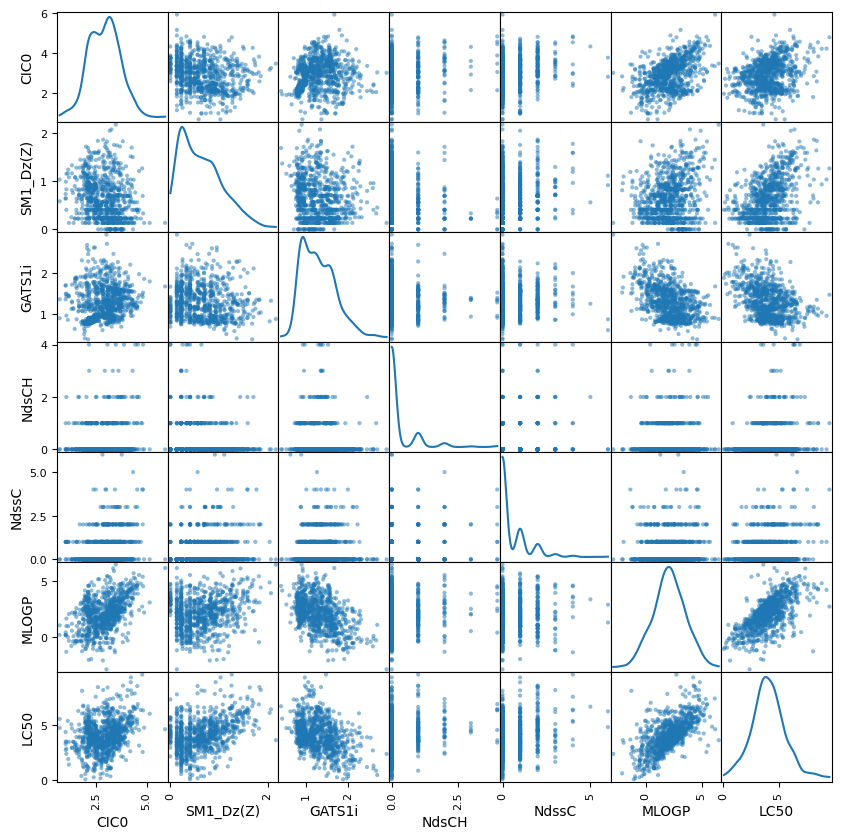

In [16]:
#Check the scatter plot of the target variable  and features
scatter_matrix(df, figsize=(10, 10), diagonal='kde')  # 'kde' to show kernel density on the diagonal
# Save the plot
plt.savefig('plots/LinearREgression/LR_scatter_matrix.png')
plt.show()

### Correlation findings:

##### Weak linear relationship between LC50 and:
- **CIC0**: slightly tendency for higher LC50 values with increasing CIC0 values
- **SM1_Dz(Z)**
- **GATS1i**: weak negative correlation with LC50
- **NdsCH**: as it is a count-based feature it shows vertical clustering
- **NdssC**: as it is a count-based feature it shows vertical clustering

##### There seems to be a fairly strong linear correlation between MLOGP and LC50. Higher values of MLOGP are associated with higher LC50 values.

##### Some of the features seem to correlate among them, such as a negative correlation between MLOGP and GATS1i and a positive correlation between MLOGP and CIC0.

### Distribution findings:

- LC50, MLOP, CIC0: normal-like distribution with a slight right skew

- SM1_Dz(Z), GATS1i: majority of the data concentrated in lower values (significant right skew)


In [18]:
#Check the correlation
df.corr()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
CIC0,1.000000,-0.235360,0.147622,0.121341,0.246639,0.463867,0.291854
SM1_Dz(Z),-0.235360,1.000000,-0.145967,-0.141401,0.163179,0.200663,0.410893
GATS1i,0.147622,-0.145967,1.000000,-0.010657,0.092410,-0.450739,-0.397965
NdsCH,0.121341,-0.141401,-0.010657,1.000000,0.188164,0.048620,0.172004
NdssC,0.246639,0.163179,0.092410,0.188164,1.000000,0.028499,0.172390
MLOGP,0.463867,0.200663,-0.450739,0.048620,0.028499,1.000000,0.651664
LC50,0.291854,0.410893,-0.397965,0.172004,0.172390,0.651664,1.000000


- MLOGP: strong positive correlation with LC50 (correlation coefficient ≈ 0.651). This confirms that this feature has a linear relationship with the target variable. There is a moderate positive correlation between MLOGP and CIC0 and a moderate negative correlation between MLOGP and GATS1i.
- SM1_Dz(Z): moderate positive correlation with LC50.
- CIC0: Shows a weaker positive correlation with LC50 (≈ 0.292), indicating a mild linear relationship.
-  NdsCH and NdsSC: it confirms a weak positive correlation with LC50.
- GATS1i: moderate negative correlation with LC50.

### Modeling

In [21]:
#'Separate' features (X) from target variable (y)
X = df.drop(["LC50"], axis=1)
y = df['LC50']

In [22]:
#Split the data into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [23]:
#Create the model
model = LinearRegression()

#Fit the training data. It calculates the intercept and the slopes
model.fit(X_train, y_train)

LinearRegression()

In [24]:
#Check the intercept
print('intercept:', model.intercept_)

intercept: 2.0779391943164405


In [25]:
#Check the slope value for each feature

#Feature column names
feature_names = X_train.columns  # Get the feature names
coefficients = model.coef_  # Get the coefficients (slopes)

# Print each feature name with its corresponding slope
for feature, coef in zip(feature_names, coefficients):
    print(f'Slope for {feature}: {coef}')


Slope for CIC0: 0.38628364604712423
Slope for SM1_Dz(Z): 1.2896638303713084
Slope for GATS1i: -0.7296530791958121
Slope for NdsCH: 0.41078524495987134
Slope for NdssC: 0.1257189161373003
Slope for MLOGP: 0.4130484306779372


- SM1_Dz(Z) may not have a strong standalone correlation with LC50, but it still substantially impacts the model when other variables are included. When SM1_Dz(Z) is increased by 1 unit, the LC50 is expected to increase by about 1.28 units.
- 
- GATS1i has a negative slope (-0.72), indicating an inverse relationship with LC50. As GATS1i increases by one unit, LC50 decreases by approximately 0.72 units.

- We must consider that the size of the coefficients may vary depending on the scale of measurements. Those coefficients are NOT a measure of correlation.

### Evaluation

In [28]:
#Find the predictions for all the test data (X_test)
yhat = model.predict(X_test)

#Find the RMSE between y_test and yhat. It gives an indication of errors
print("RMSE:", mean_squared_error(y_test, yhat, squared=False))

RMSE: 1.0295425523322534


C:\Users\noa.schnor\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- RMSE: average magnitude of the error. The lower the RMSE, the better.
- RMSE of 1.0069 suggests that, on average, the model predictions deviate from the actual values by approx 1.006 units in the target variable's scale.

In [30]:
model = LinearRegression()
model.fit(X,y)

print('Coefficient of Determination (R²):', model.score(X, y))
print('Correlation Coefficient (R):', math.sqrt(model.score(X, y)))


Coefficient of Determination (R²): 0.5771635677620811
Correlation Coefficient (R): 0.7597128192692822


- The coefficient of determination R²  is a good measure of how good the linear model is. Interpreting the coefficient of determination: 57.71% of the variance in the target variable (LC50) is explained by the linear regression model. Around 42.5% of the variability is unexplained. That means that there is still room for improvement.
- The correlation coefficient (R) closer to closer to 1 indicates a strong linear relationship between the observed and predicted values.Therefore, an R of 0.76 indicates a strong linear relationship.

### Polynominal regression

##### With a coefficient of determination R² of 0.57, there might be more complexity in the data that a linear model might not be capturing. Run a polynomial regression to check if we get a better performance. Polynomial regression allows for curved relationships between the predictors and the target variable.

In [34]:
#Evaluate the Polynomial Regression 

# Create polynomial features
poly = PolynomialFeatures(2) #2 degrees
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit a linear model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions using the polynomial features
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Evaluate the polynomial model
print('Train R²:', r2_score(y_train, y_train_pred))
print('Test R²:', r2_score(y_test, y_test_pred))
print('Train RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

Train R²: 0.6636406149761633
Test R²: 0.35802452157527664
Train RMSE: 0.8526156028084027
Test RMSE: 1.1080310442559567


- Compared to the linear regression, the polynomial regression is not indicated in this dataset. R2 of the testing data is significantly lower than the dataset. Is the polynomial model overfitting?
- Even not capturing all the complexity of the dataset, the linear regression offers a more reliable performance than the polynomial regression for this dataset.

### The end